In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [4]:
data = pd.read_csv('raw_sales2.csv')

In [6]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [20]:
def find_anomalies(data):
    anomalies =[]
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    anomaly_cutoff = random_data_std * 3
    lower_limit = random_data_mean - anomaly_cutoff
    upper_limit = random_data_mean + anomaly_cutoff
    for outlier in data:
        if outlier < lower_limit or outlier > upper_limit:
            anomalies.append(outlier)
    return anomalies

In [21]:
list_1 = find_anomalies(data['price'])

In [26]:
len(list_1)


461

In [28]:
data.price.skew()

np.float64(4.312009366902367)

In [29]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

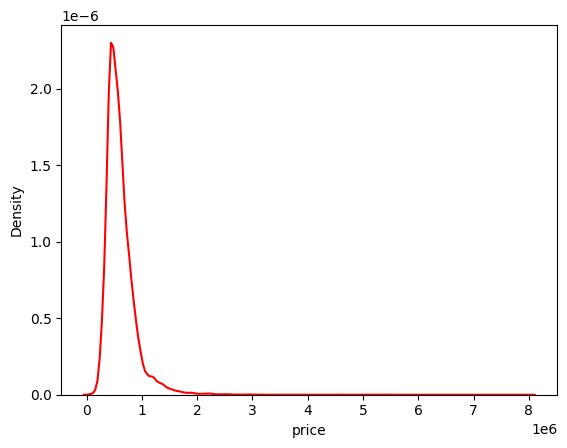

In [31]:
sns.kdeplot(data['price'], color='red', label='Price Distribution')

In [46]:
data['price_transformed'] = np.log(data['price'])

In [45]:
list_2 = find_anomalies(data['price_transformed'])

<Axes: xlabel='price_transformed', ylabel='Density'>

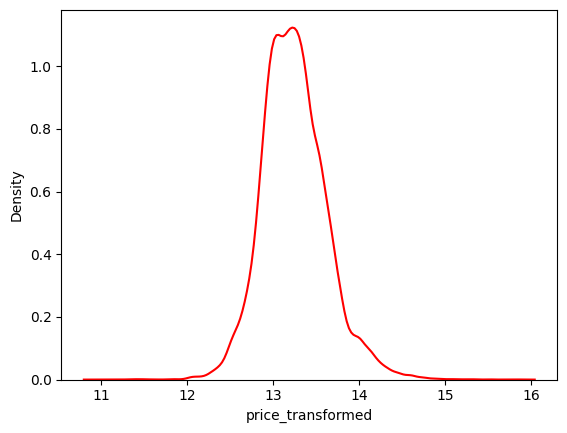

In [44]:
sns.kdeplot(data['price_transformed'], color='red', label='Price Distribution')